In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# 获取当前文件所在目录的父目录
import os
import sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

if parent_dir not in sys.path:
    sys.path.append(parent_dir)


from Dtool import fill_missing_values, plot_factors_by_pattern, plot_comparison_multiple, reverse_column, plot_feature_importance,plot_predictions


In [2]:
# 尝试多个可能的文件路径
file_paths = [
    os.path.expanduser("~/Desktop/X-BASE/Wti模型3.0/eta/Brent原油价格_合并数据.xlsx"),
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/Wti模型3.0/eta/Brent原油价格_合并数据.xlsx")
]

file_path = None
for path in file_paths:
    if os.path.isfile(path):  # 确保是文件而不是目录
        file_path = path
        break

if file_path is None:
    raise FileNotFoundError("未找到数据文件")

try:
    sheet1 = pd.ExcelFile(file_path).parse('Sheet1')
    sheet1['Date'] = pd.to_datetime(sheet1['Date'], errors='coerce')
    sheet1 = sheet1.drop(columns=['布伦特原油期货价格'])
    sheet1 = sheet1.dropna()
    sheet1 = sheet1.sort_values('Date', ascending=True)
    brent_forecast = sheet1.copy()
except Exception as e:
    raise Exception(f"读取文件时出错: {str(e)}")

brent_forecast.head(1)


,Date,Brent原油期货价格预测
18,2025-05-01,64.28


In [3]:
# 尝试多个可能的文件路径
file_paths1 = [
    os.path.expanduser("~/Desktop/X-BASE/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx"),
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx")
]

file_path1 = None
for path in file_paths1:
    if os.path.isfile(path):  # 确保是文件而不是目录
        file_path1 = path
        break

if file_path1 is None:
    raise FileNotFoundError("未找到数据文件")

try:
    sheet2 = pd.ExcelFile(file_path1).parse('Sheet1')
    sheet2['Date'] = pd.to_datetime(sheet2['Date'], errors='coerce')
    sheet2 = sheet2.drop(columns=['真实值'])
    sheet2 = sheet2.dropna()
    sheet2 = sheet2.sort_values('Date', ascending=True)
    rmb_usd_forecast = sheet2.copy()
except Exception as e:
    raise Exception(f"读取文件时出错: {str(e)}")
rmb_usd_forecast =  rmb_usd_forecast.rename(columns={'预测值':'USDCNH:即期汇率_预测'})
rmb_usd_forecast.head(1)

,Date,USDCNH:即期汇率_预测
19,2025-04-30,7.2653


In [4]:
gasoline_forecast = pd.ExcelFile('eta/山东汽油裂解差_合并数据.xlsx').parse('Sheet1')
gasoline_forecast['Date'] = pd.to_datetime(gasoline_forecast['Date'], errors='coerce')
gasoline_forecast = gasoline_forecast.sort_values('Date', ascending=True)
gasoline_forecast = gasoline_forecast.drop(columns=['真实值'])
gasoline_forecast = gasoline_forecast.dropna()
gasoline_forecast = gasoline_forecast.rename(columns={'预测值':'山东汽油裂解差_预测'})
gasoline_forecast.head(1)

,Date,山东汽油裂解差_预测
27,2025-05-03,987.543


In [5]:
diesel_forecast = pd.ExcelFile('eta/山东柴油裂解差(拟合残差版本)_合并数据.xlsx').parse('Sheet1')
diesel_forecast['Date'] = pd.to_datetime(diesel_forecast['Date'], errors='coerce')
diesel_forecast = diesel_forecast.sort_values('Date', ascending=True)
diesel_forecast = diesel_forecast.drop(columns=['山东柴油裂解差'])
diesel_forecast = diesel_forecast.dropna()
diesel_forecast = diesel_forecast.rename(columns={'预测值':'山东柴油裂解差_预测'})
diesel_forecast.head(1)

,Date,山东柴油裂解差_预测
17,2025-04-30,554.47


In [6]:
kerosene_diesel_forecast = pd.ExcelFile('eta/华东煤油-山东柴油价差_合并数据.xlsx').parse('Sheet1')
kerosene_diesel_forecast['Date'] = pd.to_datetime(kerosene_diesel_forecast['Date'], errors='coerce')
kerosene_diesel_forecast = kerosene_diesel_forecast.sort_values('Date', ascending=True)
kerosene_diesel_forecast = kerosene_diesel_forecast.drop(columns=['真实值'])
kerosene_diesel_forecast = kerosene_diesel_forecast.dropna()
kerosene_diesel_forecast = kerosene_diesel_forecast.rename(columns={'预测值':'煤柴价差日度_预测'})
kerosene_diesel_forecast.head(1)

,Date,煤柴价差日度_预测
19,2025-04-30,-400.6381


In [7]:
# 统一日期格式
brent_forecast['Date'] = pd.to_datetime(brent_forecast['Date'])
rmb_usd_forecast['Date'] = pd.to_datetime(rmb_usd_forecast['Date']) 
gasoline_forecast['Date'] = pd.to_datetime(gasoline_forecast['Date'])
diesel_forecast['Date'] = pd.to_datetime(diesel_forecast['Date'])
kerosene_diesel_forecast['Date'] = pd.to_datetime(kerosene_diesel_forecast['Date'])
# 合并所有预测数据,以日期为基准
merged_forecast = pd.merge(brent_forecast, rmb_usd_forecast, on='Date', how='inner')
merged_forecast = pd.merge(merged_forecast, gasoline_forecast, on='Date', how='inner')
merged_forecast = pd.merge(merged_forecast, diesel_forecast, on='Date', how='inner')
merged_forecast = pd.merge(merged_forecast, kerosene_diesel_forecast, on='Date', how='inner')
# 按日期排序
merged_forecast = merged_forecast.sort_values('Date')
# 显示合并后的数据
merged_forecast.head(1)

,Date,Brent原油期货价格预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差_预测,煤柴价差日度_预测
0,2025-05-05,63.14,7.2576,1030.9303,664.89,-392.2195


In [8]:
# 计算汽油价格预测
merged_forecast['汽油价格预测'] = merged_forecast['山东汽油裂解差_预测'] + merged_forecast['Brent原油期货价格预测'] * merged_forecast['USDCNH:即期汇率_预测'] * 7.33
merged_forecast['柴油价格预测'] = merged_forecast['山东柴油裂解差_预测'] + merged_forecast['Brent原油期货价格预测'] * merged_forecast['USDCNH:即期汇率_预测'] * 7.33
merged_forecast.head(1)

,Date,Brent原油期货价格预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差_预测,煤柴价差日度_预测,汽油价格预测,柴油价格预测
0,2025-05-05,63.14,7.2576,1030.9303,664.89,-392.2195,4389.865153,4023.824853


In [9]:
def solve_A_汽油(c, B):
    # 计算常数部分
    right_side = 2109.76 * 1.12 + c
    # 计算分母
    denominator = (1 - 0.12 * B) / (1 + B)
    # 计算 A 的值
    A = right_side / denominator
    return A

def solve_A_柴油(c, B):
    # 计算右侧常数部分
    right_side = 1411.2 * 1.12 + c
    # 计算分母
    denominator = (1 - 0.12 * B) / (1 + B)
    # 计算 A 的值
    A = right_side / denominator
    return A

In [10]:
# 计算汽油价格预测的A值
# 计算汽油价格预测的A值
merged_forecast['汽油价格预测_市价'] = merged_forecast['汽油价格预测'].apply(lambda x: solve_A_汽油(x, 0.13))
# 计算柴油价格预测的A值  
merged_forecast['柴油价格预测_市价'] = merged_forecast['柴油价格预测'].apply(lambda x: solve_A_柴油(x, 0.13))
# 计算煤油价格预测的A值
merged_forecast['煤油价格预测_市价'] = merged_forecast['柴油价格预测_市价'] + merged_forecast['煤柴价差日度_预测']
merged_forecast.head(1)

,Date,Brent原油期货价格预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差_预测,煤柴价差日度_预测,汽油价格预测,柴油价格预测,汽油价格预测_市价,柴油价格预测_市价,煤油价格预测_市价
0,2025-05-05,63.14,7.2576,1030.9303,664.89,-392.2195,4389.865153,4023.824853,7751.584599,6433.296225,6041.076725


In [11]:
# 读取历史数据
historical_data = pd.read_excel('data_input_auto/Brent-汽油-柴油-煤油.xlsx')
historical_data = historical_data[historical_data['DataTime'] >= '2023-01-01']
historical_data = historical_data.rename(columns={'ICE Europe Brent Crude M1':'布伦特原油现货价格'})
# 显示历史数据
historical_data.tail(1)

,DataTime,布伦特原油现货价格,山东92#汽油净价,山东0#柴油净价,煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）
3781,2025-04-30,NaN,NaN,NaN,6000.0


In [12]:
# 将历史数据
historical_monthly = historical_data.copy()
historical_monthly['DataTime'] = pd.to_datetime(historical_monthly['DataTime'])
# 净价 到 市价
historical_monthly['汽油价格_市价'] = historical_monthly['山东92#汽油净价'].apply(lambda x: solve_A_汽油(x, 0.13))
historical_monthly['柴油价格_市价'] = historical_monthly['山东0#柴油净价'].apply(lambda x: solve_A_柴油(x, 0.13))
historical_monthly.head(1)

,DataTime,布伦特原油现货价格,山东92#汽油净价,山东0#柴油净价,煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）,汽油价格_市价,柴油价格_市价
3156,2023-01-03,82.1,4338.8292,4668.2181,7100.0,7693.000053,7172.999973


In [13]:
# 将 historical_monthly 的 Date 列转换为 datetime 类型
historical_monthly['Date'] = pd.to_datetime(historical_monthly['DataTime'])
# 将 merged_forecast 的 Date 列转换为 datetime 类型
merged_forecast['Date'] = pd.to_datetime(merged_forecast['Date'])

# 合并数据集并选择指定列
combined_data = pd.merge(
    merged_forecast[['Date', '汽油价格预测_市价', '柴油价格预测_市价', '煤油价格预测_市价']],
    historical_monthly[['Date', '汽油价格_市价', '柴油价格_市价', '煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）']],
    on='Date',
    how='outer'
)[['Date', '汽油价格_市价', '汽油价格预测_市价', '柴油价格_市价', '柴油价格预测_市价', 
   '煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）', '煤油价格预测_市价']]

# 按日期降序排序
combined_data = combined_data.sort_values(by='Date', ascending=False)
combined_data_1 = combined_data.copy()
# 将日期格式转换为年/月/日格式  
combined_data_1['Date'] = combined_data_1['Date'].dt.strftime('%Y/%m/%d')
# 保存合并后的数据到 Excel 文件
combined_data_1.to_excel('eta/2024年成油品价格_日度数据_拟合残差.xlsx', index=False, float_format='%.0f')
# 显示合并后的数据的前几行
combined_data_1.head(1)

,Date,汽油价格_市价,汽油价格预测_市价,柴油价格_市价,柴油价格预测_市价,煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）,煤油价格预测_市价
640,2025/05/23,NaN,7733.868333,NaN,6320.351631,NaN,5859.665431


In [14]:
combined_data_1_monthly = combined_data_1.copy()


combined_data_1_monthly['Date'] = pd.to_datetime(combined_data_1_monthly['Date'])
combined_data_1_monthly = combined_data_1_monthly.sort_values(by='Date', ascending=True)
combined_data_1_monthly = combined_data_1_monthly.set_index('Date')
combined_data_1_monthly = combined_data_1_monthly.resample('ME').mean()
combined_data_1_monthly.reset_index(inplace=True)
combined_data_1_monthly = combined_data_1_monthly.sort_values('Date', ascending=False)
combined_data_1_monthly['Date'] = combined_data_1_monthly['Date'].dt.strftime('%Y/%m/%d')
combined_data_1_monthly.to_excel('eta/2024年成油品价格_月度数据_拟合残差.xlsx', index=False, float_format='%.0f')

# 显示合并后的数据的前几行
combined_data_1_monthly.head(1)


,Date,汽油价格_市价,汽油价格预测_市价,柴油价格_市价,柴油价格预测_市价,煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）,煤油价格预测_市价
28,2025/05/31,NaN,7550.673098,NaN,6279.955306,NaN,5850.489686


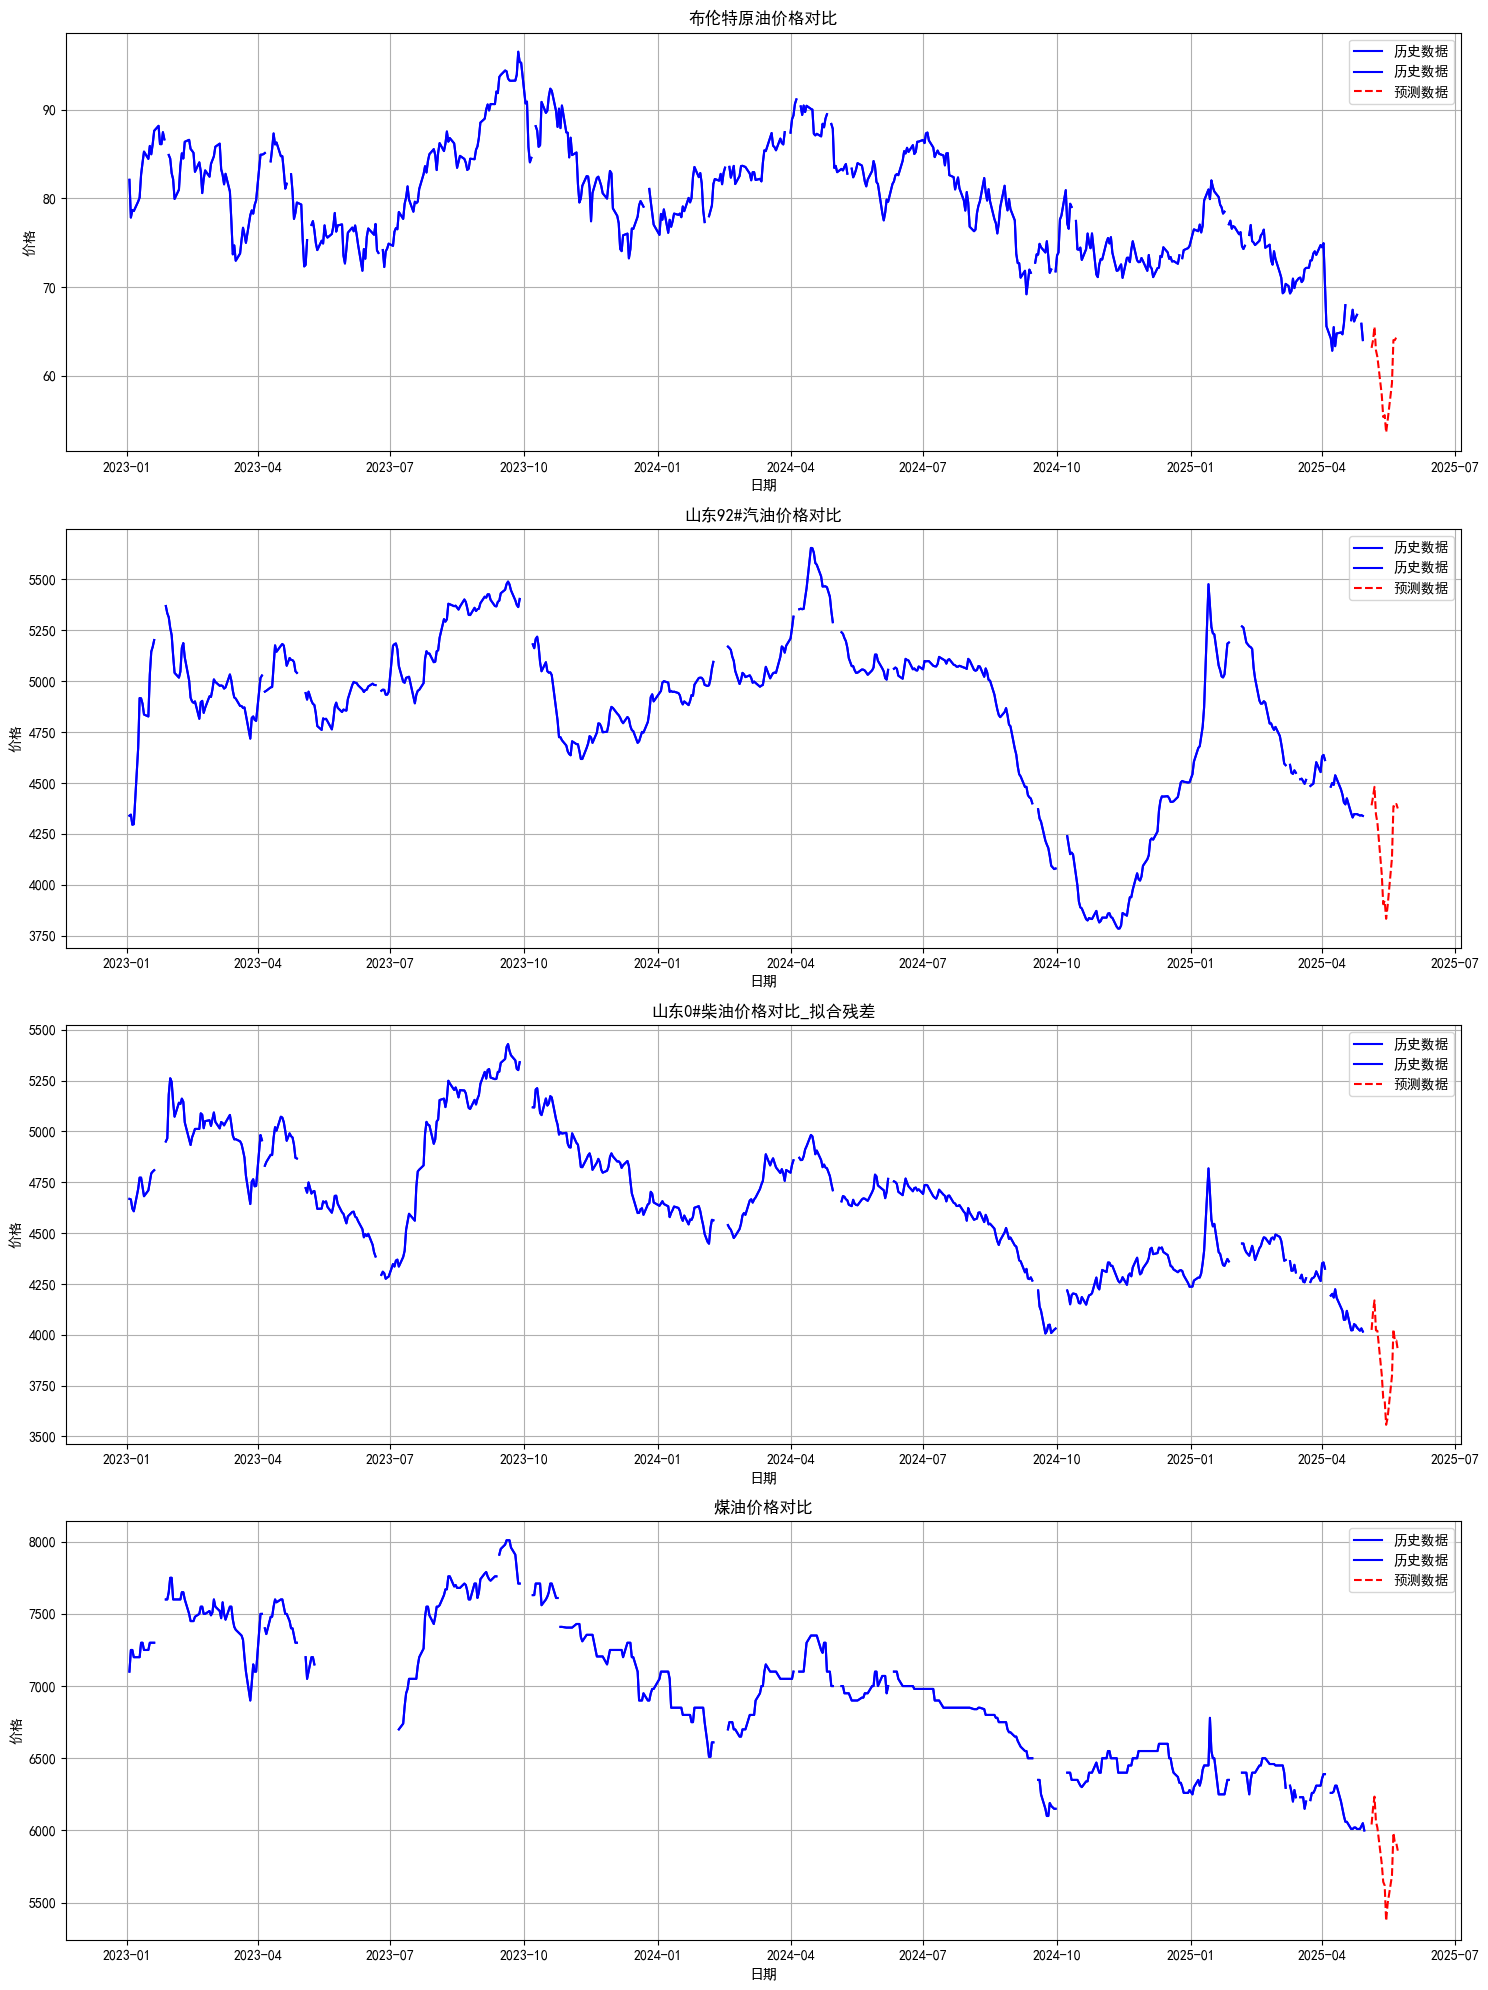

In [15]:
# 修改数据列名以匹配
historical_monthly = historical_monthly.rename(columns={'DataTime': 'Date'})

# 设置绘图风格
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建子图
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# 布伦特原油价格对比图
axes[0].plot(historical_monthly['Date'], historical_monthly['布伦特原油现货价格'], 'b-', label='历史数据')
axes[0].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['Brent原油期货价格预测'], 'r--', label='预测数据')
axes[0].set_title('布伦特原油价格对比')
axes[0].set_xlabel('日期')
axes[0].set_ylabel('价格')
axes[0].legend()
axes[0].grid(True)

# 汽油价格对比图
axes[1].plot(historical_monthly['Date'], historical_monthly['山东92#汽油净价'], 'b-', label='历史数据')
axes[1].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['汽油价格预测'], 'r--', label='预测数据')
axes[1].set_title('山东92#汽油价格对比')
axes[1].set_xlabel('日期')
axes[1].set_ylabel('价格')
axes[1].legend()
axes[1].grid(True)

# 柴油价格对比图
axes[2].plot(historical_monthly['Date'], historical_monthly['山东0#柴油净价'], 'b-', label='历史数据')
axes[2].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['柴油价格预测'], 'r--', label='预测数据')
axes[2].set_title('山东0#柴油价格对比_拟合残差')
axes[2].set_xlabel('日期')
axes[2].set_ylabel('价格')
axes[2].legend()
axes[2].grid(True)

# 煤油价格对比图
axes[3].plot(historical_monthly['Date'], historical_monthly['煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）'], 'b-', label='历史数据')
axes[3].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['煤油价格预测_市价'], 'r--', label='预测数据')
axes[3].set_title('煤油价格对比')
axes[3].set_xlabel('日期')
axes[3].set_ylabel('价格')
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


In [16]:
split_data = combined_data_1.copy()
# 创建汽油价格对比数据框
df_gasoline = split_data[['Date', '汽油价格_市价', '汽油价格预测_市价']].copy()
# 创建柴油价格对比数据框 
df_diesel = split_data[['Date', '柴油价格_市价', '柴油价格预测_市价']].copy()
# 创建煤油价格对比数据框
df_kerosene = split_data[['Date', '煤油：低硫低密度：3#：市场主流价：华东地区：华东炼厂（日）', '煤油价格预测_市价']].copy()

---

In [17]:
'''
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "汽油价格预测市价"

# 调用函数更新数据
success = update_excel_data(df_gasoline, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")
'''

'\nfrom Dcel import update_excel_data\n# 使用示例\nfile_path = "eta/1.汽柴煤油_数据上传.xlsx"\nsheet_name = "日度数据表"\nidentifier = "汽油价格预测市价"\n\n# 调用函数更新数据\nsuccess = update_excel_data(df_gasoline, file_path, sheet_name, identifier)\n\nif success:\n    print("数据已成功更新到Excel文件")\nelse:\n    print("数据更新失败，请检查错误信息")\n'

In [18]:
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "柴油价格预测市价(拟合残差)"

# 调用函数更新数据
success = update_excel_data(df_diesel, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

成功更新 日度数据表 中的数据
数据已成功更新到Excel文件


In [19]:
'''
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.汽柴煤油_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "煤油价格预测市价"

# 调用函数更新数据
success = update_excel_data(df_kerosene, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")
    
'''

'\nfrom Dcel import update_excel_data\n# 使用示例\nfile_path = "eta/1.汽柴煤油_数据上传.xlsx"\nsheet_name = "日度数据表"\nidentifier = "煤油价格预测市价"\n\n# 调用函数更新数据\nsuccess = update_excel_data(df_kerosene, file_path, sheet_name, identifier)\n\nif success:\n    print("数据已成功更新到Excel文件")\nelse:\n    print("数据更新失败，请检查错误信息")\n\n'